In [0]:
inputPath = dbutils.widgets.get("inputPath")
print(inputPath)
outputPath = dbutils.widgets.get("outputPath")
print(outputPath)
feedCount = dbutils.widgets.get("feedCount")
print(feedCount)

/dbfs/mnt/g2dev_workspaces/dev/order/NLP_USECASE/customerFeed_InputPath/NLP_DS.csv
/dbfs/mnt/g2dev_workspaces/dev/order/NLP_USECASE/customerFeed_OutputPath/sampleOutputnew1.csv
2000

In [0]:
from gensim import corpora, models, similarities
from itertools import chain
import pandas as pd
import numpy as np

In [0]:
df1 = pd.read_csv(inputPath,encoding= 'unicode_escape')

In [0]:
df1.head()

Out[10]:

,Month,Calendar Date,Site Name (SBS),Channel,Question 1 2 Answer,Question 3 Answer,Any Comments Suggestions
0,Sep-20,03/09/2020,MAN,voice,The consultant was unable to help me,Frustrated,My travel agent has gone into admin traction a...
1,Sep-20,14/09/2020,BOM,voice,NaN,Unmoved,He should check the system and confirmed to me...
2,Sep-20,18/09/2020,DXB-SBS,chat,NaN,Unmoved,NaN
3,Sep-20,19/09/2020,DXB,chat,I could not find the information I needed on E...,Angry,All I wanted was my money back ASAP but I have...
4,Sep-20,19/09/2020,BOM,chat,Attitude of the consultant,Angry,"RJ was lazy, unprofessional and rude. Then, h..."


In [0]:
df2=df1.groupby(by=['Question 1 2 Answer']).count()

In [0]:
df2.head()

Out[6]:

,Month,Calendar Date,Site Name (SBS),Channel,Question 3 Answer,Any Comments Suggestions
Question 1 2 Answer,,,,,,
Attitude of the consultant,4203,4203,4203,4203,4203,2663
Communication skills of the consultant,1887,1887,1887,1887,1887,1105
I could not find the information I needed on Emirates.com,1400,1400,1400,1400,1400,910
I do not like a policy or procedure,1923,1923,1923,1923,1923,1379
I had a technical issue when trying to do what I wanted on Emirates.com,619,619,619,619,619,440


In [0]:
df2.sort_values("Any Comments Suggestions", ascending=False)

Out[7]:

,Month,Calendar Date,Site Name (SBS),Channel,Question 3 Answer,Any Comments Suggestions
Question 1 2 Answer,,,,,,
The consultant was unable to help me,6265,6265,6265,6265,6265,3867
Attitude of the consultant,4203,4203,4203,4203,4203,2663
Knowledge of the consultant,2815,2815,2815,2815,2815,1729
I do not like a policy or procedure,1923,1923,1923,1923,1923,1379
Communication skills of the consultant,1887,1887,1887,1887,1887,1105
I have had to contact you multiple times,1254,1254,1254,1254,1254,918
I could not find the information I needed on Emirates.com,1400,1400,1400,1400,1400,910
I had a technical issue when trying to do what I wanted on Emirates.com,619,619,619,619,619,440
It was difficult to get through to you,594,594,594,594,594,386


In [0]:
df1.isna().sum()

Out[8]: Month 0
Calendar Date 0
Site Name (SBS) 0
Channel 0
Question 1 2 Answer 14211
Question 3 Answer 0
Any Comments Suggestions 14487
dtype: int64

In [0]:
df1 = df1.dropna(subset=['Any Comments Suggestions'])

In [0]:
df1.isna().sum()

Out[10]: Month 0
Calendar Date 0
Site Name (SBS) 0
Channel 0
Question 1 2 Answer 7627
Question 3 Answer 0
Any Comments Suggestions 0
dtype: int64

In [0]:
df1 = df1.dropna(subset=['Question 1 2 Answer'])

In [0]:
df1.head()

Out[13]:

,Month,Calendar Date,Site Name (SBS),Channel,Question 1 2 Answer,Question 3 Answer,Any Comments Suggestions
0,Sep-20,03/09/2020,MAN,voice,The consultant was unable to help me,Frustrated,My travel agent has gone into admin traction a...
3,Sep-20,19/09/2020,DXB,chat,I could not find the information I needed on E...,Angry,All I wanted was my money back ASAP but I have...
4,Sep-20,19/09/2020,BOM,chat,Attitude of the consultant,Angry,"RJ was lazy, unprofessional and rude. Then, h..."
8,Sep-20,24/09/2020,BOM,voice,I have had to contact you multiple times,Frustrated,Refund for the tickets 1762333625387 & 1762333...
9,Sep-20,25/09/2020,DXB,chat,The consultant was unable to help me,Confused,A certain follow up procedure for such issues....


In [0]:
#t=df1.groupby(['Month','Question 1 2 Answer'])['Any Comments Suggestions'].count()>=500

In [0]:
t=df1.groupby('Question 1 2 Answer')['Any Comments Suggestions'].count()>=int(feedCount)

In [0]:
elg_cat = t[t].index.tolist()

In [0]:
elg_cat

Out[16]: ['Attitude of the consultant', 'The consultant was unable to help me']

In [0]:
dategrp=df1.groupby(by=['Calendar Date']).count()

In [0]:
dategrp.sort_values("Any Comments Suggestions", ascending=False)

Out[18]:

,Month,Site Name (SBS),Channel,Question 1 2 Answer,Question 3 Answer,Any Comments Suggestions
Calendar Date,,,,,,
20/10/2020,111,111,111,111,111,111
30/11/2020,109,109,109,109,109,109
17/11/2020,107,107,107,107,107,107
19/10/2020,106,106,106,106,106,106
05/10/2020,105,105,105,105,105,105
...,...,...,...,...,...,...
29/09/2020,1,1,1,1,1,1
03/09/2020,1,1,1,1,1,1
28/09/2020,1,1,1,1,1,1


In [0]:
filtered_df = df1[df1['Question 1 2 Answer'].isin(elg_cat)]
print(filtered_df )

Month ... Any Comments Suggestions
0 Sep-20 ... My travel agent has gone into admin traction a...
4 Sep-20 ... RJ was lazy, unprofessional and rude. Then, h...
9 Sep-20 ... A certain follow up procedure for such issues....
10 Sep-20 ... Tarek has to study again how to deal with cust...
40 Oct-20 ... Agent didn¿¿¿t help me at all and said contact...
... ... ... ...
36012 Apr-21 ... Consultation was available only in English and...
36014 Apr-21 ... Very disappointed
36020 Apr-21 ... Agent had no knowledge. I had to escalate to...
36025 Apr-21 ... you send an email and cancel my flight while I...
36026 Apr-21 ... Did not understand the situation and seemed no...

[6530 rows x 7 columns]

In [0]:
filtered_df.head()

Out[20]:

,Month,Calendar Date,Site Name (SBS),Channel,Question 1 2 Answer,Question 3 Answer,Any Comments Suggestions
0,Sep-20,03/09/2020,MAN,voice,The consultant was unable to help me,Frustrated,My travel agent has gone into admin traction a...
4,Sep-20,19/09/2020,BOM,chat,Attitude of the consultant,Angry,"RJ was lazy, unprofessional and rude. Then, h..."
9,Sep-20,25/09/2020,DXB,chat,The consultant was unable to help me,Confused,A certain follow up procedure for such issues....
10,Sep-20,26/09/2020,DXB,chat,Attitude of the consultant,Angry,Tarek has to study again how to deal with cust...
40,Oct-20,01/10/2020,DXB,chat,The consultant was unable to help me,Angry,Agent didn¿¿¿t help me at all and said contact...


In [0]:
filtered_df.to_csv("/dbfs/mnt/g2dev_workspaces/dev/order/NLP_USECASE/customerFeed_OutputPath/Actual_payload.csv")

In [0]:
grpby_df=filtered_df.groupby(by=['Question 1 2 Answer']).count()

In [0]:
grpby_df.sort_values("Any Comments Suggestions", ascending=False)

Out[23]:

,Month,Calendar Date,Site Name (SBS),Channel,Question 3 Answer,Any Comments Suggestions
Question 1 2 Answer,,,,,,
The consultant was unable to help me,3867,3867,3867,3867,3867,3867
Attitude of the consultant,2663,2663,2663,2663,2663,2663


In [0]:
table = pd.pivot_table(filtered_df, values='Question 1 2 Answer', index=['Month'],
                    columns=['Channel'], aggfunc=np.count_nonzero)

In [0]:
table1 = pd.pivot_table(filtered_df, values='Any Comments Suggestions', index=['Month','Channel'],
                    columns=['Question 3 Answer'], aggfunc=np.count_nonzero)

In [0]:
table2 = pd.pivot_table(df1, values='Question 3 Answer', index=['Month'],
                    columns=['Channel'], aggfunc=np.count_nonzero)

In [0]:
table3 = pd.pivot_table(filtered_df, values='Channel', index=['Month'],
                    columns=['Question 1 2 Answer'], aggfunc=np.count_nonzero)

Out[28]:

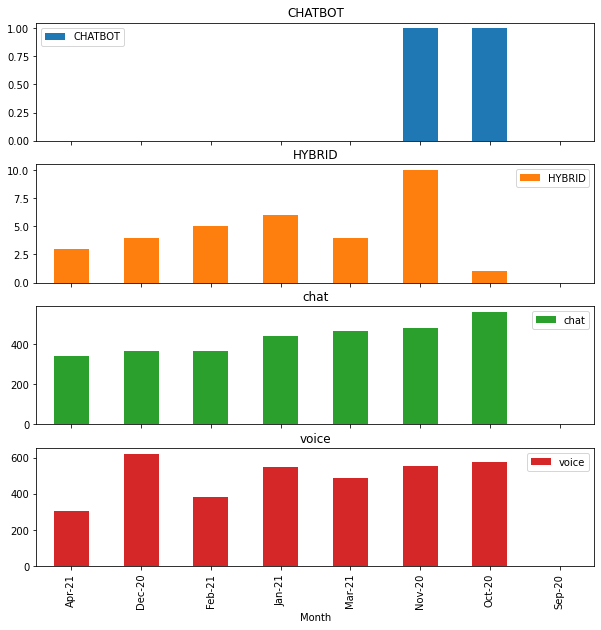

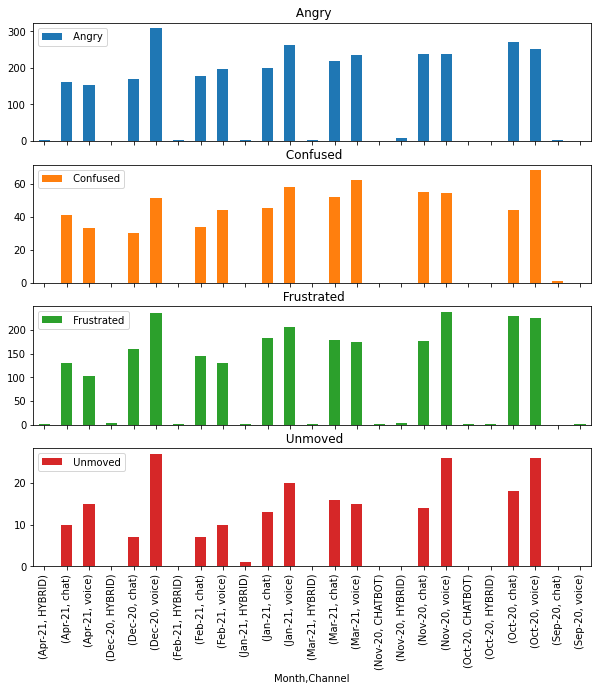

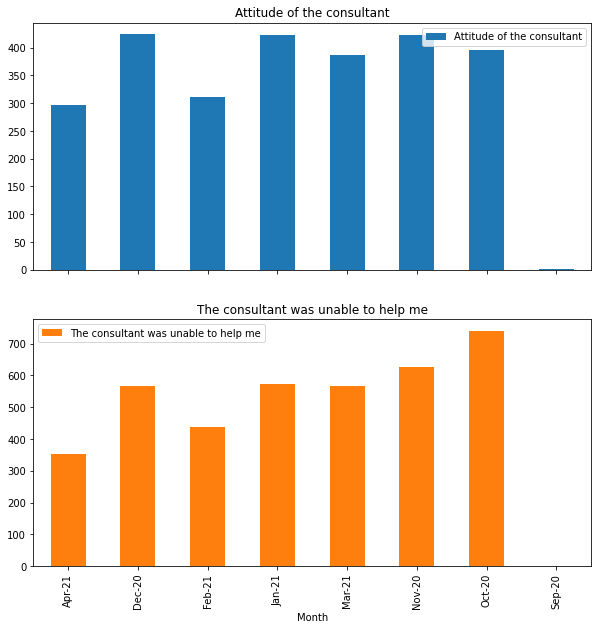

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3858888b0>,
 <matplotlib.axes._subplots.AxesSubplot object at 0x7fa385a0a820>],
 dtype=object)

In [0]:
table.plot.bar(subplots=True,figsize=(10,10))
table1.plot.bar(subplots=True,figsize=(10,10))
table3.plot.bar(subplots=True,figsize=(10,10))

Out[29]:

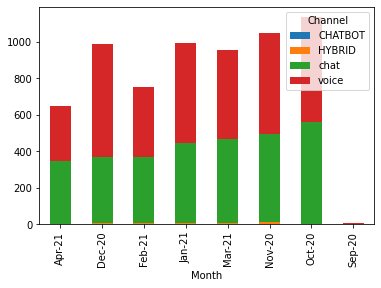

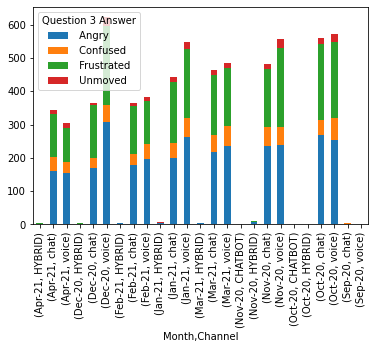

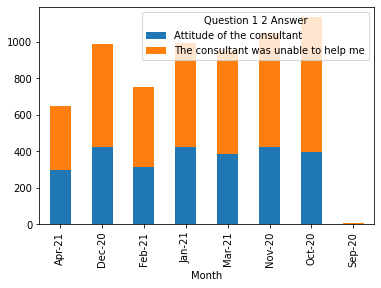

<matplotlib.axes._subplots.AxesSubplot at 0x7fa3803dc850>

In [0]:
table.plot.bar(stacked=True)
table1.plot.bar(stacked=True)
table3.plot.bar(stacked=True)

In [0]:
df = pd.DataFrame(filtered_df, columns= ['Question 1 2 Answer','Any Comments Suggestions'])

In [0]:
df.shape

Out[21]: (6530, 2)

In [0]:
review_list = df.values.tolist()

In [0]:
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Unzipping corpora/stopwords.zip.

In [0]:
import RAKE as rk
import operator

In [0]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    pattern = r'[0-9]'
    text = re.sub(pattern, '', text)
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('¿', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     

    # removing the emojies               # https://www.kaggle.com/alankritamishra/covid-19-tweet-sentiment-analysis#Sentiment-analysis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   
    return text

In [0]:
filt_review = df['Any Comments Suggestions'].apply(cleaning)
df['Corrected Feed'] = filt_review

In [0]:
df.head()

Out[37]:

,Question 1 2 Answer,Any Comments Suggestions,Corrected Feed
0,The consultant was unable to help me,My travel agent has gone into admin traction a...,my travel agent has gone into admin traction a...
4,Attitude of the consultant,"RJ was lazy, unprofessional and rude. Then, h...",rj was lazy unprofessional and rude then he l...
9,The consultant was unable to help me,A certain follow up procedure for such issues....,a certain follow up procedure for such issues ...
10,Attitude of the consultant,Tarek has to study again how to deal with cust...,tarek has to study again how to deal with cust...
40,The consultant was unable to help me,Agent didn¿¿¿t help me at all and said contact...,agent didnt help me at all and said contact yo...


In [0]:
rake_object = rk.Rake("/dbfs/mnt/g2dev_workspaces/dev/order/NLP_USECASE/customerFeed_InputPath/SmartStopList.txt")

In [0]:
catg_group = df.groupby("Question 1 2 Answer")
for name, group in catg_group:
    print(name)

Attitude of the consultant
The consultant was unable to help me

In [0]:
pwd

Out[40]: '/databricks/driver'

In [0]:
cons_top = []
dv = {}
doclist = {}
act_topic_out = pd.DataFrame(columns=['TimeStamp','Category','Topic','Word','P'])
df_dominant_topic_total = pd.DataFrame(columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text'])
for name, group in catg_group:
    total_phrase = []
    for index, row in df.iterrows():
        if row['Question 1 2 Answer'] == name:
          keywords = rake_object.run(row['Corrected Feed'])
          total_phrase.append(keywords)
          #type(keywords)
          #print("keywords: ", keywords )
          tot_fil_phr = list(filter(None, total_phrase))
          first_tuple_elements = [a_tuple[0] for a_tuple in tot_fil_phr]
          doclist["mylist2"+name]=[]
          for item in tot_fil_phr:
            my_list=[]
            for tup in item:
              str1 = tup[0]
              my_list.append(str1.replace(' ','_'))
            doclist["mylist2"+name].append(my_list)

In [0]:
id2w = {}
for name, group in catg_group:
  id2w["id2word"+name] = corpora.Dictionary(doclist["mylist2"+name])
  all_tokens = sum(doclist["mylist2"+name], [])
  tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
  texts = [[word for word in text if word not in tokens_once] for text in doclist["mylist2"+name]]
  dv["mm"+name] = [id2w["id2word"+name].doc2bow(text) for text in texts]  

In [0]:
for name, group in catg_group:
  lda = models.ldamodel.LdaModel(corpus=dv["mm"+name], id2word=id2w["id2word"+name], num_topics=5, \
                               update_every=1, chunksize=1000, passes=1)
  lda.save("lda"+name+".model")  

In [0]:
act_topic_out = pd.DataFrame(columns=['TimeStamp','Category','Topic','Word','P'])
for name, group in catg_group:
  lda =  models.LdaModel.load("lda"+name+".model")
  top_words_per_topic = []
  for t in range(lda.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in lda.show_topic(t, topn = 5)])
    final_res=pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
    final_res.insert(0, "Category", name)
    final_res.insert(0, 'TimeStamp', pd.to_datetime('now').replace(microsecond=0))
        #topic_lst = final_res.values.tolist()
        #act_topic_out = pd.DataFrame.append(topic_lst, columns = ['column_name1','column_name2','column_name3','column_name4','column_name5'])
  act_topic_out = act_topic_out.append(final_res)
act_topic_out.to_csv("/dbfs/mnt/g2dev_workspaces/dev/order/NLP_USECASE/customerFeed_OutputPath/lda_categorywise_modelling_fin.csv")

In [0]:
cons_top = []
dv = {}
doclist = {}
act_topic_out = pd.DataFrame(columns=['TimeStamp','Category','Topic','Word','P'])
df_dominant_topic_total = pd.DataFrame(columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text'])
for name, group in catg_group:
    total_phrase = []
    for index, row in df.iterrows():
        if row['Question 1 2 Answer'] == name:
          keywords = rake_object.run(row['Corrected Feed'])
          total_phrase.append(keywords)
          type(keywords)
          print("keywords: ", keywords )
          tot_fil_phr = list(filter(None, total_phrase))
          first_tuple_elements = [a_tuple[0] for a_tuple in tot_fil_phr]
          doclist["mylist2"+name]=[]
          for item in tot_fil_phr:
            my_list=[]
            for tup in item:
              str1 = tup[0]
              my_list.append(str1.replace(' ','_'))
            doclist["mylist2"+name].append(my_list)
          id2word = corpora.Dictionary(doclist["mylist2"+name])
    # remove words that appear only once
          all_tokens = sum(doclist["mylist2"+name], [])
          tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
          texts = [[word for word in text if word not in tokens_once] for text in doclist["mylist2"+name]]
          dv["mm"+name] = [id2word.doc2bow(text) for text in texts]
    # Trains the LDA models.
          lda = models.ldamodel.LdaModel(corpus=dv["mm"+name], id2word=id2word, num_topics=5, \
                               update_every=1, chunksize=1000, passes=1)
          lda.save("lda"+name+".model")
    # Prints the topics.
    #for top in lda.print_topics():
    #    print(top)
    #print
        top_words_per_topic = []
        for t in range(lda.num_topics):
          top_words_per_topic.extend([(t, ) + x for x in lda.show_topic(t, topn = 5)])
          final_res=pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P'])
          final_res.insert(0, "Category", name)
          final_res.insert(0, 'TimeStamp', pd.to_datetime('now').replace(microsecond=0))
        #topic_lst = final_res.values.tolist()
        #act_topic_out = pd.DataFrame.append(topic_lst, columns = ['column_name1','column_name2','column_name3','column_name4','column_name5'])
        act_topic_out = act_topic_out.append(final_res)
    #final_res.to_csv("top_words4.csv")
    ##df_dominant_topic.head(10)
act_topic_out.to_csv("/dbfs/mnt/g2dev_workspaces/dev/order/NLP_USECASE/customerFeed_OutputPath/lda_categorywise_modelling.csv")

keywords: [('business owne', 4.0), ('customer service', 4.0), ('lazy unprofessional', 3.5), ('lazy', 1.5), ('rj', 1.0), ('rude', 1.0), ('lied', 1.0), ('ended', 1.0), ('chat', 1.0), ('told', 1.0), ('end', 1.0), ('finished', 1.0), ('travel', 1.0), ('world', 1.0), ('airline', 1.0), ('times', 1.0), ('ceo', 1.0), ('employee', 1.0), ('unrprofessional', 1.0), ('raj', 1.0), ('fire', 1.0), ('spot', 1.0)]
/databricks/python/lib/python3.8/site-packages/gensim/models/ldamodel.py:821: RuntimeWarning: divide by zero encountered in double_scalars
 perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)
keywords: [('tarek', 1.0), ('study', 1.0), ('deal', 1.0), ('customers', 1.0)]
/databricks/python/lib/python3.8/site-packages/gensim/models/ldamodel.py:821: RuntimeWarning: divide by zero encountered in double_scalars
 perwordbound = self.bound(chunk, subsample_ratio=subsample_ratio) / (subsample_ratio * corpus_words)
keywords: [('contacting live chat', 8.0), ('patience required', 4.0), ('disconnected abruptly', 4.0), ('chat', 2.0), ('part', 1.0), ('consultant', 1.0), ('helped', 1.0), ('closed', 1.0), ('typing', 1.0), ('minute', 1.0), ('checking', 1.0), ('asked', 1.0), ('contact', 1.0), ('link', 1.0), ('purpose', 1.0)]
keywords: [('refund fuk upiece', 9.0), ('shit airline', 4.0)]
keywords: []
keywords: [('work', 1.0)]
keywords: [('providing info', 4.0), ('disconnected', 1.0), ('chat', 1.0)]
keywords: [('rude refused', 3.5), ('rude', 1.5), ('listen', 1.0), ('rushed', 1.0)]
keywords: [('vanessa', 1.0), ('couldnt', 1.0), ('question', 1.0), ('disappointed', 1.0), ('end', 1.0), ('ended', 1.0), ('session', 1.0), ('talking', 1.0)]
keywords: [('interrumpirme mientras lo cuento como', 25.0), ('llamar para terminar de resolver', 23.0), ('se oa nada haba', 16.0), ('fijose supone el consultor', 15.0), ('tengo ganas de volver', 15.0), ('era de fijo', 10.0), ('llamar maana ahora', 10.0), ('estoy tan cabreada', 9.0), ('el telfono', 5.0), ('ya volver', 5.0), ('funcionaba bien', 4.0), ('es serio', 4.0), ('esto gracias', 4.0), ('eso', 1.0), ('pasa', 1.0), ('pidi', 1.0), ('volviera', 1.0), ('enfrentarme', 1.0)]
keywords: [('representative hang', 4.0), ('call', 1.0), ('face', 1.0), ('completion', 1.0), ('request', 1.0), ('action', 1.0)]
keywords: [('helpful person', 4.0), ('customer service', 4.0), ('welcoming', 1.0), ('deal', 1.0), ('left', 1.0), ('upset', 1.0), ('expected', 1.0)]
keywords: [('arnold', 1.0), ('helpful', 1.0), ('ways', 1.0), ('bit', 1.0), ('attitude', 1.0), ('uncalled', 1.0)]
keywords: [('customer service jumped', 9.0), ('chat sending', 4.0), ('proper answer', 4.0), ('answers', 1.0), ('giving', 1.0), ('time', 1.0), ('direct', 1.0), ('questions', 1.0), ('hurry', 1.0), ('end', 1.0), ('links', 1.0), ('enquiry', 1.0), ('managed', 1.0), ('understand', 1.0), ('question', 1.0), ('gave', 1.0)]
keywords: [('end conversation', 4.0), ('logical', 1.0), ('respond', 1.0), ('message', 1.0), ('minutes', 1.0), ('team', 1.0), ('anytime', 1.0)]
keywords: [('attitude lesser mixing', 8.0), ('yearsdidnt experience', 4.0), ('attitude', 2.0), ('arabic', 1.0), ('dealing', 1.0), ('kind', 1.0), ('tone', 1.0), ('tnx', 1.0)]
keywords: [('consultant ended', 4.0), ('im writing', 4.0), ('chatting', 1.0), ('problem', 1.0)]
keywords: [('simple questions', 4.0), ('representative', 1.0), ('listen', 1.0), ('carefully', 1.0), ('customer', 1.0), ('answering', 1.0), ('end', 1.0)]
keywords: [('common airline', 4.0), ('time', 1.0), ('staff', 1.0), ('hung', 1.0), ('felt', 1.0), ('interested', 1.0), ('listening', 1.0)]
keywords: [('didnt give', 4.0), ('exact answer', 4.0)]
keywords: [('soft skills', 4.0), ('deal', 1.0), ('customers', 1.0)]
keywords: [('karthik hanged', 4.0), ('agents', 1.0), ('long', 1.0), ('reply', 1.0)]
keywords: [('agent', 1.0), ('speaking', 1.0), ('guys', 1.0)]
keywords: [('karthik attitude', 4.0), ('large sum', 4.0), ('replied', 1.0), ('felt', 1.0), ('rude', 1.0), ('unhelpful', 1.0), ('offset', 1.0), ('long', 1.0), ('defensi

In [0]:
def format_topics_sentences(ldamodel=None, corpus=None, texts=list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [0]:
df_dominant_topic_total = pd.DataFrame(columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text'])
for name, group in catg_group:
  lda =  models.LdaModel.load("lda"+name+".model")
  mm="mm"+name
  mylist2="mylist2"+name
  for t in range(lda.num_topics):
      df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=dv[mm], texts=doclist[mylist2])
    # Format
      df_dominant_topic = df_topic_sents_keywords.reset_index()
      df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
      df_dominant_topic_total.append(df_dominant_topic)
df_dominant_topic_total.to_csv("/dbfs/mnt/g2dev_workspaces/dev/order/NLP_USECASE/customerFeed_OutputPath/lda_dominant_topic.csv")

In [0]:
doclist['mylist2The consultant was unable to help me']

Out[41]: [['price_im_due',
 'encrypted__im',
 'admin_traction',
 'couldnt_give',
 'travel_agent',
 'agent',
 'refund',
 'apparently',
 'charged',
 'contact'],
 ['business_owne',
 'customer_service',
 'lazy_unprofessional',
 'lazy',
 'rj',
 'rude',
 'lied',
 'ended',
 'chat',
 'told',
 'end',
 'finished',
 'travel',
 'world',
 'airline',
 'times',
 'ceo',
 'employee',
 'unrprofessional',
 'raj',
 'fire',
 'spot'],
 ['follow',
 'procedure',
 'issues',
 'case',
 'passengers',
 'ek',
 'adminstration'],
 ['tarek', 'study', 'deal', 'customers'],
 ['agent_didnt', 'agent', 'contact'],
 ['absolutely_disgusting', 'treats', 'customers'],
 ['contacting_live_chat',
 'patience_required',
 'disconnected_abruptly',
 'chat',
 'part',
 'consultant',
 'helped',
 'closed',
 'typing',
 'minute',
 'checking',
 'asked',
 'contact',
 'link',
 'purpose'],
 ['customer_care_leaves_appalling',
 'satisfying_answer',
 'enquiries_answered',
 'satisfactory_manner',
 'phone_number',
 'frustrating',
 'find',
 'member',
 'staff',
 'questions',
 'easy',
 'preferred',
 'speak',
 'directly'],
 ['refund__fuk__upiece', 'shit_airline'],
 ['communicate_reference_numbers', 'baggage_claim', 'follow'],
 ['pcr_tests_accurately',
 'multiple_conflicting_instructions',
 'transiting_passengers_unacceptable',
 'answer',
 'questions',
 'timing',
 'requirements'],
 ['great_customer_service',
 'tauseer_ended',
 'essentially',
 'happened',
 'chat',
 'giving',
 'answer',
 'disappointing'],
 ['collecting_miles', 'feel', 'useless'],
 ['happy',
 'till',
 'speak',
 'mustafa',
 'great',
 'understanding',
 'assist',
 'return',
 'call',
 'hours',
 'mentioned'],
 ['connect', 'team', 'happen'],
 ['visa_sabb_signature',
 'skywards_account',
 'contact_sabb',
 'bank_told',
 'contact',
 'told',
 'issue',
 'connect'],
 ['agent_ended', 'chat', 'helping'],
 ['selling_tickets', 'ban', 'travel'],
 ['money_back',
 'didnt_contact',
 'decent_company',
 'absolute_disgrace',
 'refund_process',
 'process',
 'disappointed',
 'find',
 'flights',
 'cancelled',
 'initiated',
 'september',
 'waited',
 'months',
 'found',
 'started',
 'means',
 'wait',
 'ridiculous',
 'faith',
 'actions',
 'remedy',
 'situation'],
 ['cancelled_flights_due',
 'received_half',
 'covid_paid',
 'ticket_holder',
 'ticket',
 'paid',
 'people',
 'apply'],
 ['work'],
 ['providing_info', 'disconnected', 'chat'],
 ['consultant_due',
 'strong_accent',
 'refund_booked',
 'hard',
 'understand',
 'cancel',
 'request',
 'class'],
 ['person', 'listen', 'carefully'],
 ['contact_customer_affairs',
 'phone_number',
 'march_email',
 'avenue_offered',
 'urgently',
 'elusive',
 'contacted',
 'matter',
 'good'],
 ['comment'],
 ['rude_refused', 'rude', 'listen', 'rushed'],
 ['vanessa',
 'couldnt',
 'question',
 'disappointed',
 'end',
 'ended',
 'session',
 'talking'],
 ['call_back', 'clarification'],
 ['completely_unaware',
 'visa_requirements',
 'south_africa',
 'uk_passport',
 'airline',
 'travel',
 'surprised'],
 ['im',
 'waiting',
 'answer',
 'time',
 'pickup',
 'chauffer',
 'charges',
 'put',
 'hold',
 'forgotten',
 'minutes'],
 ['touch', 'directly'],
 ['interrumpirme_mientras_lo_cuento_como',
 'llamar_para_terminar_de_resolver',
 'se_oa_nada_haba',
 'fijose_supone_el_consultor',
 'tengo_ganas_de_volver',
 'era_de_fijo',
 'llamar_maana_ahora',
 'estoy_tan_cabreada',
 'el_telfono',
 'ya_volver',
 'funcionaba_bien',
 'es_serio',
 'esto_gracias',
 'eso',
 'pasa',
 'pidi',
 'volviera',
 'enfrentarme'],
 ['ultimately_unable',
 'query_forward',
 'waited__months',
 'money_back',
 'back',
 'agent',
 'helpful',
 'friendly',
 'move',
 'queue',
 'refund',
 'frustrating'],
 ['travel_agency__ticket',
 'booking_ref_noekkymj',
 'team_member',
 'provide',
 'information',
 'cancelled',
 'payment',
 'refunded'],
 ['completely_unaware',
 'visa_requirements',
 'south_africa',
 'uk_passport',
 'airline',
 'travel',
 'surprised'],
 ['south_africa', 'guidelines', 'travel'],
 ['long_waitingmy_suggestion_call_back',
 'long',
 'friendly',
 'unable',
 'solve',
 'problems'

In [0]:
import matplotlib.pyplot as plt
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [0]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [0]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [0]:
#lda_AC =  models.LdaModel.load('ldaAttitude of the consultant.model')
#import pyLDAvis.gensim
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_AC, dv['mmAttitude of the consultant'], dictionary=lda_AC.id2word)
#vis

In [0]:
pyl = {}
import pyLDAvis.gensim
for name, group in catg_group:
  ("lda"+name+".model")
  lda_ConsSpeak =  models.LdaModel.load("lda"+name+".model")
  mm="mm"+name
  pyLDAvis.enable_notebook()
  pyl["vis"+name] = pyLDAvis.gensim.prepare(lda_ConsSpeak, dv[mm], dictionary=lda_ConsSpeak.id2word)
pyl["visAttitude of the consultant"]

Out[47]:

In [0]:
pyl["visThe consultant was unable to help me"]

Out[46]:

In [0]:
from collections import Counter
topics = lda.show_topics(formatted=False)
data_flat = [w for w_list in mylist2 for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()